<a href="https://colab.research.google.com/github/sravanjosh07/Self_Driving_cars-Udemy/blob/master/Plot_Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline


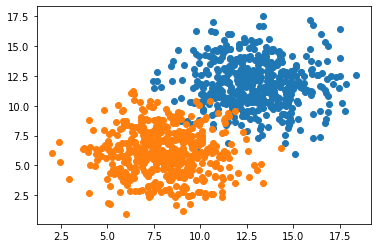

In [48]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])


In [49]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation= 'sigmoid'))
adam = Adam(learning_rate=0.1)
model.compile(adam, loss = "binary_crossentropy", metrics = ["accuracy"])
h = model.fit(x = X, y = y, verbose = 2, batch_size = 75, epochs = 50, shuffle = "true")



Epoch 1/50
14/14 - 0s - loss: 1.4526 - accuracy: 0.5490
Epoch 2/50
14/14 - 0s - loss: 0.6751 - accuracy: 0.6160
Epoch 3/50
14/14 - 0s - loss: 0.5109 - accuracy: 0.7400
Epoch 4/50
14/14 - 0s - loss: 0.4407 - accuracy: 0.7980
Epoch 5/50
14/14 - 0s - loss: 0.4019 - accuracy: 0.8520
Epoch 6/50
14/14 - 0s - loss: 0.3666 - accuracy: 0.8850
Epoch 7/50
14/14 - 0s - loss: 0.3344 - accuracy: 0.9080
Epoch 8/50
14/14 - 0s - loss: 0.3076 - accuracy: 0.9310
Epoch 9/50
14/14 - 0s - loss: 0.2885 - accuracy: 0.9300
Epoch 10/50
14/14 - 0s - loss: 0.2644 - accuracy: 0.9510
Epoch 11/50
14/14 - 0s - loss: 0.2460 - accuracy: 0.9520
Epoch 12/50
14/14 - 0s - loss: 0.2319 - accuracy: 0.9560
Epoch 13/50
14/14 - 0s - loss: 0.2220 - accuracy: 0.9550
Epoch 14/50
14/14 - 0s - loss: 0.2068 - accuracy: 0.9620
Epoch 15/50
14/14 - 0s - loss: 0.1968 - accuracy: 0.9600
Epoch 16/50
14/14 - 0s - loss: 0.1871 - accuracy: 0.9650
Epoch 17/50
14/14 - 0s - loss: 0.1790 - accuracy: 0.9640
Epoch 18/50
14/14 - 0s - loss: 0.1717 - 

Text(0.5, 1.0, 'Accuracy')

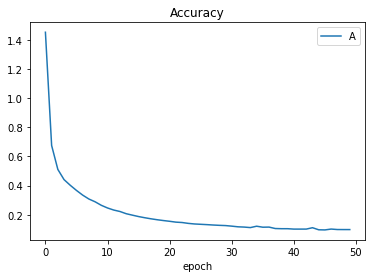

In [50]:
plt.plot(h.history["loss"])
plt.xlabel("epoch")
plt.legend("Accuracy")
plt.title("Accuracy")


In [53]:
def plot_decision_boundary(X,y,model):
  x_span = np.linspace(min(X[:,0]-1), max(X[:,0]+1), num = 50)
  y_span = np.linspace(min(X[:,1]-1), max(X[:,1]+1), num = 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_,yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_,yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx,yy, z)


The prediction is: [[0.00184417]]


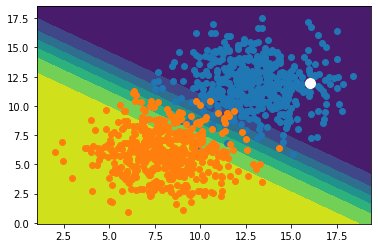

In [62]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])


x = 16
y =12
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker = "o", markersize = 10, color = "white")
print("The prediction is:", prediction)